# 🛠️ Adventurer Mart: ML Data Preparation - Part 2

## 🔍 2. Exploratory Data Analysis (EDA)

This notebook performs comprehensive exploratory data analysis on the loaded Adventurer Mart data.

### 🎯 Objectives
- Understand data distributions and patterns
- Identify relationships between variables
- Detect data quality issues
- Generate insights for ML model development
- Export analyzed data for next phase

### 📋 Analysis Areas
- Basic statistics and distributions
- Categorical variable analysis
- Numerical variable patterns
- Correlation analysis
- Visual exploration

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings
from scipy import stats

warnings.filterwarnings('ignore')

# Set visualization style
plt.style.use('default')
sns.set_palette("husl")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("📦 Libraries imported successfully!")
print("🎨 Visualization settings configured")

📦 Libraries imported successfully!
🎨 Visualization settings configured


In [2]:
# Load data from previous phase
print("📂 LOADING DATA FROM PHASE 1")
print("=" * 50)

try:
    # Load the dataframes from Phase 1
    with open('data_intermediate/01_dataframes.pkl', 'rb') as f:
        dataframes = pickle.load(f)
    print("✅ Loaded dataframes from Phase 1")
    
    # Load table information
    with open('data_intermediate/01_table_info.pkl', 'rb') as f:
        table_info = pickle.load(f)
    print("✅ Loaded table metadata")
    
    # Load table names
    with open('data_intermediate/01_table_names.pkl', 'rb') as f:
        table_names = pickle.load(f)
    print("✅ Loaded table names")
    
    print(f"\n📊 Dataset Overview:")
    print(f"   • Tables loaded: {len(dataframes)}")
    print(f"   • Table names: {', '.join(table_names)}")
    
except FileNotFoundError as e:
    print(f"❌ Error loading data: {e}")
    print("🔄 Please run 01_data_loading_preview.ipynb first")
    raise

📂 LOADING DATA FROM PHASE 1
✅ Loaded dataframes from Phase 1
✅ Loaded table metadata
✅ Loaded table names

📊 Dataset Overview:
   • Tables loaded: 9
   • Table names: details_adventure_gear, details_magic_items, details_weapons, details_armor, details_potions, details_poisons, all_products, customers, sales


In [3]:
# Basic Statistical Summary for all tables
print("📊 BASIC STATISTICAL SUMMARY")
print("=" * 60)

def generate_basic_stats(df, table_name):
    """Generate comprehensive basic statistics for a DataFrame"""
    print(f"\n📋 Table: {table_name}")
    print("-" * 40)
    
    # Basic info
    print(f"📏 Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"💾 Memory: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")
    
    # Data types summary
    dtype_counts = df.dtypes.value_counts()
    print(f"\n📝 Data Types:")
    for dtype, count in dtype_counts.items():
        print(f"   • {dtype}: {count} columns")
    
    # Missing values
    missing_counts = df.isnull().sum()
    total_missing = missing_counts.sum()
    if total_missing > 0:
        print(f"\n🕳️ Missing Values: {total_missing:,} total")
        missing_cols = missing_counts[missing_counts > 0]
        for col, count in missing_cols.head(5).items():
            pct = (count / len(df)) * 100
            print(f"   • {col}: {count:,} ({pct:.1f}%)")
        if len(missing_cols) > 5:
            print(f"   • ... and {len(missing_cols) - 5} more columns")
    else:
        print(f"\n✅ No missing values")
    
    # Duplicates
    duplicates = df.duplicated().sum()
    if duplicates > 0:
        print(f"\n🔄 Duplicate rows: {duplicates:,} ({(duplicates/len(df))*100:.1f}%)")
    else:
        print(f"\n✅ No duplicate rows")
    
    # Numerical columns summary
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    if len(numeric_cols) > 0:
        print(f"\n🔢 Numerical Columns ({len(numeric_cols)}):")
        for col in numeric_cols[:3]:  # Show first 3
            col_data = df[col].dropna()
            if len(col_data) > 0:
                print(f"   • {col}: [{col_data.min():.2f}, {col_data.max():.2f}]")
        if len(numeric_cols) > 3:
            print(f"   • ... and {len(numeric_cols) - 3} more")
    
    # Categorical columns summary
    categorical_cols = df.select_dtypes(include=['object']).columns
    if len(categorical_cols) > 0:
        print(f"\n📝 Categorical Columns ({len(categorical_cols)}):")
        for col in categorical_cols[:3]:  # Show first 3
            unique_count = df[col].nunique()
            print(f"   • {col}: {unique_count} unique values")
        if len(categorical_cols) > 3:
            print(f"   • ... and {len(categorical_cols) - 3} more")
    
    return {
        'shape': df.shape,
        'memory_kb': df.memory_usage(deep=True).sum() / 1024,
        'missing_total': total_missing,
        'duplicates': duplicates,
        'numeric_cols': len(numeric_cols),
        'categorical_cols': len(categorical_cols)
    }

# Generate statistics for all tables
all_stats = {}
for table_name, df in dataframes.items():
    stats = generate_basic_stats(df, table_name)
    all_stats[table_name] = stats

print("\n" + "="*60)
print("✅ Basic statistical analysis completed!")

📊 BASIC STATISTICAL SUMMARY

📋 Table: details_adventure_gear
----------------------------------------
📏 Shape: 106 rows × 6 columns
💾 Memory: 35.49 KB

📝 Data Types:
   • object: 6 columns

🕳️ Missing Values: 1 total
   • weight: 1 (0.9%)

✅ No duplicate rows

📝 Categorical Columns (6):
   • item_id: 106 unique values
   • name: 105 unique values
   • price: 25 unique values
   • ... and 3 more

📋 Table: details_magic_items
----------------------------------------
📏 Shape: 199 rows × 6 columns
💾 Memory: 69.67 KB

📝 Data Types:
   • object: 6 columns

✅ No missing values

✅ No duplicate rows

📝 Categorical Columns (6):
   • item_id: 199 unique values
   • name: 199 unique values
   • price: 49 unique values
   • ... and 3 more

📋 Table: details_weapons
----------------------------------------
📏 Shape: 37 rows × 8 columns
💾 Memory: 17.22 KB

📝 Data Types:
   • object: 8 columns

✅ No missing values

✅ No duplicate rows

📝 Categorical Columns (8):
   • item_id: 37 unique values
   • name:

In [4]:
# Detailed analysis of categorical variables
print("📝 CATEGORICAL VARIABLES ANALYSIS")
print("=" * 60)

def analyze_categorical_columns(df, table_name, max_unique_to_show=10):
    """Detailed analysis of categorical variables"""
    categorical_cols = df.select_dtypes(include=['object']).columns
    
    if len(categorical_cols) == 0:
        print(f"\n📋 {table_name}: No categorical columns found")
        return {}
    
    print(f"\n📋 Table: {table_name}")
    print("-" * 40)
    
    analysis_results = {}
    
    for col in categorical_cols:
        print(f"\n🔍 Column: {col}")
        
        # Basic statistics
        unique_count = df[col].nunique()
        total_count = len(df[col].dropna())
        missing_count = df[col].isnull().sum()
        
        print(f"   📊 Unique values: {unique_count:,}")
        print(f"   📊 Total non-null: {total_count:,}")
        print(f"   📊 Missing: {missing_count:,}")
        
        # Value counts
        value_counts = df[col].value_counts()
        
        # Show top values
        print(f"   🔝 Top values:")
        for i, (value, count) in enumerate(value_counts.head(5).items()):
            pct = (count / total_count) * 100
            print(f"      {i+1}. '{value}': {count:,} ({pct:.1f}%)")
        
        # Cardinality analysis
        cardinality_ratio = unique_count / total_count if total_count > 0 else 0
        
        if cardinality_ratio > 0.9:
            print(f"   ⚠️ High cardinality ({cardinality_ratio:.2%}) - mostly unique values")
        elif cardinality_ratio < 0.1:
            print(f"   ✅ Low cardinality ({cardinality_ratio:.2%}) - good for encoding")
        else:
            print(f"   📊 Medium cardinality ({cardinality_ratio:.2%})")
        
        # Store analysis
        analysis_results[col] = {
            'unique_count': unique_count,
            'total_count': total_count,
            'missing_count': missing_count,
            'cardinality_ratio': cardinality_ratio,
            'top_values': value_counts.head(5).to_dict()
        }
    
    return analysis_results

# Analyze categorical variables for all tables
categorical_analysis_results = {}
for table_name, df in dataframes.items():
    analysis = analyze_categorical_columns(df, table_name)
    if analysis:
        categorical_analysis_results[table_name] = analysis

print("\n" + "="*60)
print("✅ Categorical analysis completed!")

📝 CATEGORICAL VARIABLES ANALYSIS

📋 Table: details_adventure_gear
----------------------------------------

🔍 Column: item_id
   📊 Unique values: 106
   📊 Total non-null: 106
   📊 Missing: 0
   🔝 Top values:
      1. '01-Ars': 1 (0.9%)
      2. '83-Rrs': 1 (0.9%)
      3. '81-Rrs': 1 (0.9%)
      4. '80-Rrs': 1 (0.9%)
      5. '79-Rrs': 1 (0.9%)
   ⚠️ High cardinality (100.00%) - mostly unique values

🔍 Column: name
   📊 Unique values: 105
   📊 Total non-null: 106
   📊 Missing: 0
   🔝 Top values:
      1. 'Flask or Tankard': 2 (1.9%)
      2. 'Abacus': 1 (0.9%)
      3. 'Parchment (one sheet)': 1 (0.9%)
      4. 'Robes': 1 (0.9%)
      5. 'Rations (l day)': 1 (0.9%)
   ⚠️ High cardinality (99.06%) - mostly unique values

🔍 Column: price
   📊 Unique values: 25
   📊 Total non-null: 106
   📊 Missing: 0
   🔝 Top values:
      1. '1 gp': 19 (17.9%)
      2. '2 gp': 15 (14.2%)
      3. '5 gp': 14 (13.2%)
      4. '10 gp': 8 (7.5%)
      5. '25 gp': 7 (6.6%)
   📊 Medium cardinality (23.58%)



In [6]:
# Detailed analysis of numerical variables
print("🔢 NUMERICAL VARIABLES ANALYSIS")
print("=" * 60)

def analyze_numerical_columns(df, table_name):
    """Detailed analysis of numerical variables"""
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    
    if len(numeric_cols) == 0:
        print(f"\n📋 {table_name}: No numerical columns found")
        return {}
    
    print(f"\n📋 Table: {table_name}")
    print("-" * 40)
    
    analysis_results = {}
    
    for col in numeric_cols:
        print(f"\n🔍 Column: {col}")
        
        col_data = df[col].dropna()
        
        if len(col_data) == 0:
            print(f"   ❌ No valid data")
            continue
        
        # Basic statistics
        desc = col_data.describe()
        
        print(f"   📊 Count: {len(col_data):,}")
        print(f"   📊 Mean: {desc['mean']:.2f}")
        print(f"   📊 Median: {desc['50%']:.2f}")
        print(f"   📊 Std: {desc['std']:.2f}")
        print(f"   📊 Range: [{desc['min']:.2f}, {desc['max']:.2f}]")
        
        # Distribution analysis
        from scipy import stats as scipy_stats
        skewness = scipy_stats.skew(col_data)
        kurtosis = scipy_stats.kurtosis(col_data)
        
        print(f"   📈 Skewness: {skewness:.2f}", end="")
        if abs(skewness) < 0.5:
            print(" (approximately normal)")
        elif skewness > 0.5:
            print(" (right-skewed)")
        else:
            print(" (left-skewed)")
        
        print(f"   📈 Kurtosis: {kurtosis:.2f}", end="")
        if abs(kurtosis) < 0.5:
            print(" (normal-like tails)")
        elif kurtosis > 0.5:
            print(" (heavy tails)")
        else:
            print(" (light tails)")
        
        # Outlier detection (IQR method)
        Q1 = desc['25%']
        Q3 = desc['75%']
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = col_data[(col_data < lower_bound) | (col_data > upper_bound)]
        outlier_pct = (len(outliers) / len(col_data)) * 100
        
        print(f"   🎯 Outliers (IQR): {len(outliers):,} ({outlier_pct:.1f}%)")
        
        # Zero and negative values
        zeros = (col_data == 0).sum()
        negatives = (col_data < 0).sum()
        
        if zeros > 0:
            print(f"   🟡 Zero values: {zeros:,} ({(zeros/len(col_data))*100:.1f}%)")
        if negatives > 0:
            print(f"   🔴 Negative values: {negatives:,} ({(negatives/len(col_data))*100:.1f}%)")
        
        # Store analysis
        analysis_results[col] = {
            'count': len(col_data),
            'mean': desc['mean'],
            'median': desc['50%'],
            'std': desc['std'],
            'min': desc['min'],
            'max': desc['max'],
            'skewness': skewness,
            'kurtosis': kurtosis,
            'outlier_count': len(outliers),
            'outlier_pct': outlier_pct,
            'zeros': zeros,
            'negatives': negatives
        }
    
    return analysis_results

# Analyze numerical variables for all tables
numerical_analysis_results = {}
for table_name, df in dataframes.items():
    analysis = analyze_numerical_columns(df, table_name)
    if analysis:
        numerical_analysis_results[table_name] = analysis

print("\n" + "="*60)
print("✅ Numerical analysis completed!")

🔢 NUMERICAL VARIABLES ANALYSIS

📋 details_adventure_gear: No numerical columns found

📋 details_magic_items: No numerical columns found

📋 details_weapons: No numerical columns found

📋 details_armor: No numerical columns found

📋 details_potions: No numerical columns found

📋 Table: details_poisons
----------------------------------------

🔍 Column: dc
   📊 Count: 15
   📊 Mean: 13.73
   📊 Median: 13.00
   📊 Std: 2.60
   📊 Range: [10.00, 19.00]
   📈 Skewness: 0.23 (approximately normal)
   📈 Kurtosis: -0.63 (light tails)
   🎯 Outliers (IQR): 0 (0.0%)

📋 all_products: No numerical columns found

📋 Table: customers
----------------------------------------

🔍 Column: age
   📊 Count: 1,423
   📊 Mean: 128.32
   📊 Median: 85.00
   📊 Std: 132.12
   📊 Range: [12.00, 735.00]
   📈 Skewness: 2.55 (right-skewed)
   📈 Kurtosis: 7.24 (heavy tails)
   🎯 Outliers (IQR): 89 (6.3%)

📋 Table: sales
----------------------------------------

🔍 Column: quantity
   📊 Count: 57,915
   📊 Mean: 80.18
   📊 Media

📊 CREATING EDA VISUALIZATIONS


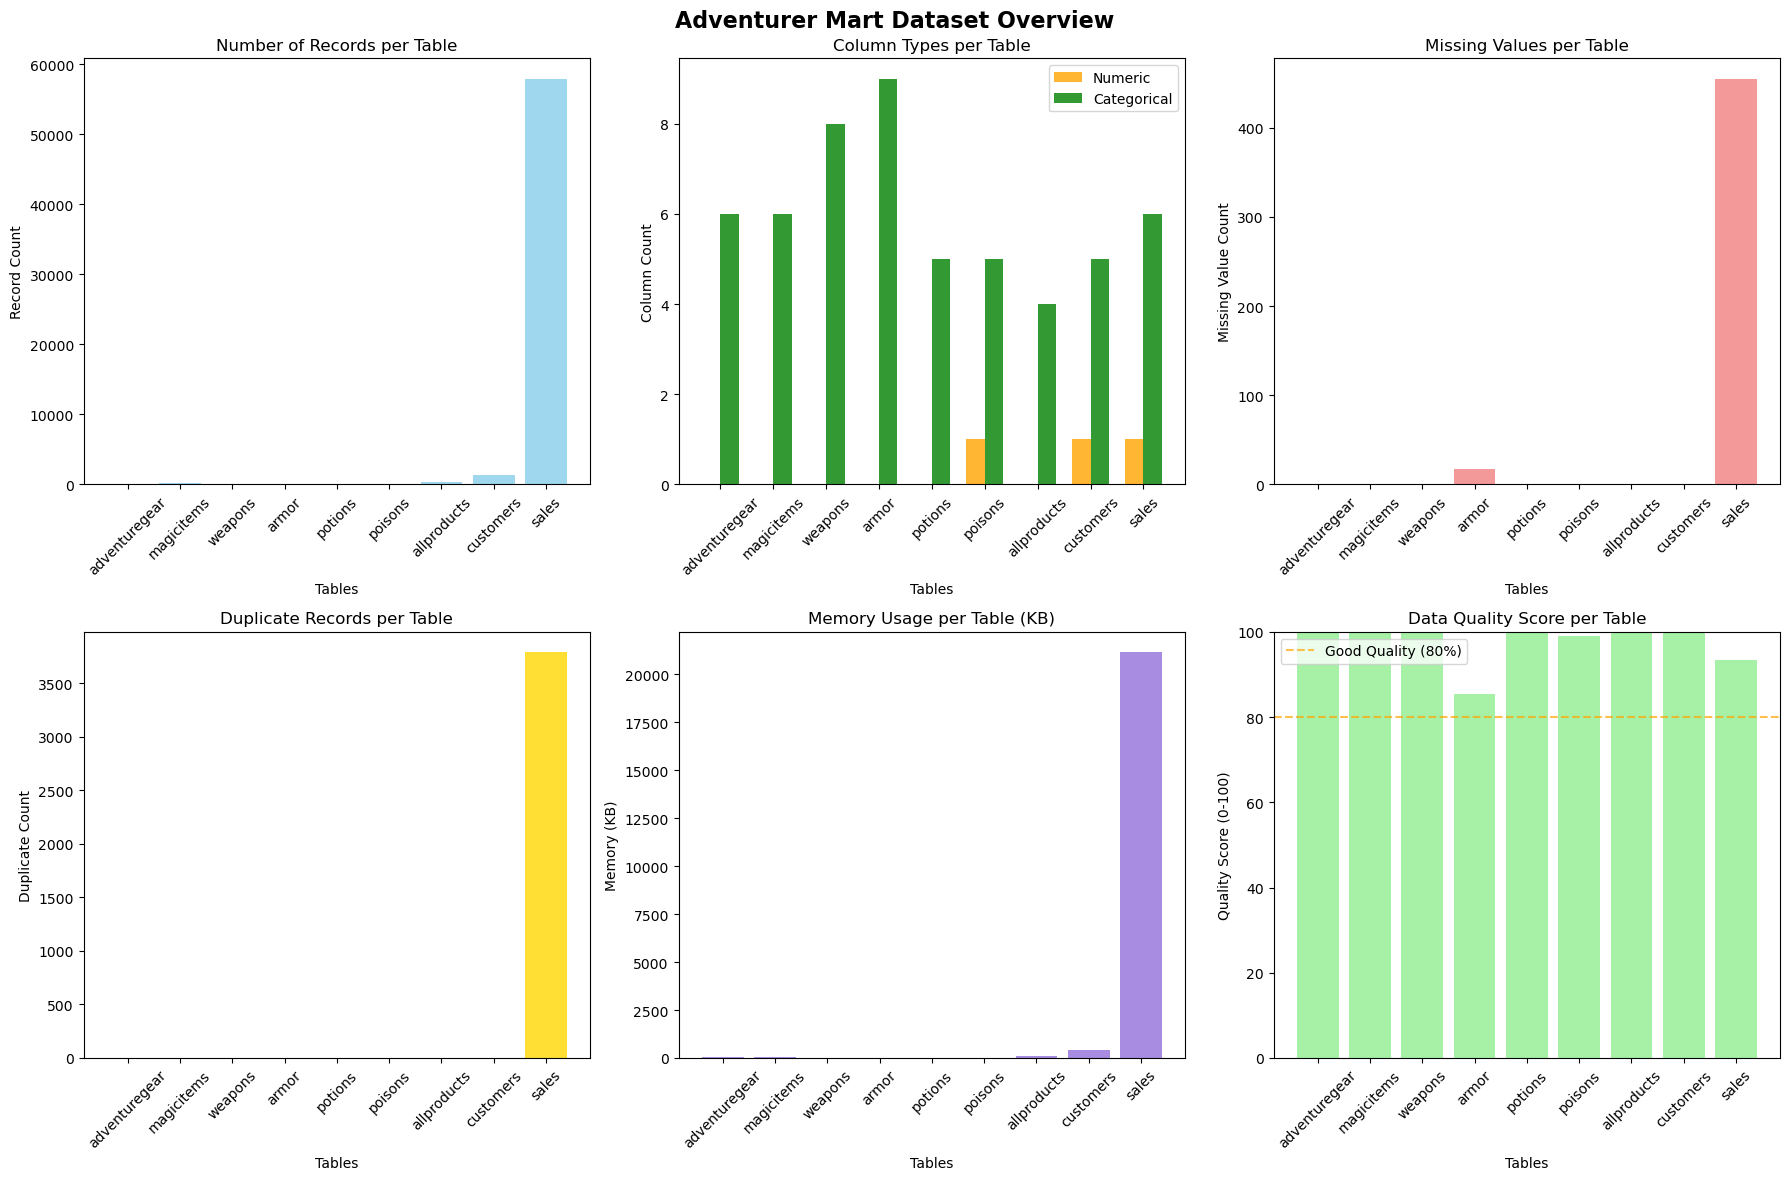

✅ EDA visualizations created!


In [7]:
# Create comprehensive visualizations
print("📊 CREATING EDA VISUALIZATIONS")
print("=" * 60)

def create_eda_visualizations():
    """Create comprehensive EDA visualizations"""
    
    # Figure 1: Dataset Overview
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('Adventurer Mart Dataset Overview', fontsize=16, fontweight='bold')
    
    # 1. Table sizes
    table_sizes = [len(df) for df in dataframes.values()]
    table_names_short = [name.replace('details', '').replace('_', '') for name in dataframes.keys()]
    
    axes[0,0].bar(range(len(table_sizes)), table_sizes, color='skyblue', alpha=0.8)
    axes[0,0].set_title('Number of Records per Table')
    axes[0,0].set_xlabel('Tables')
    axes[0,0].set_ylabel('Record Count')
    axes[0,0].set_xticks(range(len(table_names_short)))
    axes[0,0].set_xticklabels(table_names_short, rotation=45)
    
    # 2. Column distribution
    numeric_counts = [all_stats[table]['numeric_cols'] for table in dataframes.keys()]
    categorical_counts = [all_stats[table]['categorical_cols'] for table in dataframes.keys()]
    
    x = np.arange(len(table_names_short))
    width = 0.35
    axes[0,1].bar(x - width/2, numeric_counts, width, label='Numeric', alpha=0.8, color='orange')
    axes[0,1].bar(x + width/2, categorical_counts, width, label='Categorical', alpha=0.8, color='green')
    axes[0,1].set_title('Column Types per Table')
    axes[0,1].set_xlabel('Tables')
    axes[0,1].set_ylabel('Column Count')
    axes[0,1].set_xticks(x)
    axes[0,1].set_xticklabels(table_names_short, rotation=45)
    axes[0,1].legend()
    
    # 3. Missing values overview
    missing_counts = [all_stats[table]['missing_total'] for table in dataframes.keys()]
    axes[0,2].bar(range(len(missing_counts)), missing_counts, color='lightcoral', alpha=0.8)
    axes[0,2].set_title('Missing Values per Table')
    axes[0,2].set_xlabel('Tables')
    axes[0,2].set_ylabel('Missing Value Count')
    axes[0,2].set_xticks(range(len(table_names_short)))
    axes[0,2].set_xticklabels(table_names_short, rotation=45)
    
    # 4. Duplicate records
    duplicate_counts = [all_stats[table]['duplicates'] for table in dataframes.keys()]
    axes[1,0].bar(range(len(duplicate_counts)), duplicate_counts, color='gold', alpha=0.8)
    axes[1,0].set_title('Duplicate Records per Table')
    axes[1,0].set_xlabel('Tables')
    axes[1,0].set_ylabel('Duplicate Count')
    axes[1,0].set_xticks(range(len(table_names_short)))
    axes[1,0].set_xticklabels(table_names_short, rotation=45)
    
    # 5. Memory usage
    memory_usage = [all_stats[table]['memory_kb'] for table in dataframes.keys()]
    axes[1,1].bar(range(len(memory_usage)), memory_usage, color='mediumpurple', alpha=0.8)
    axes[1,1].set_title('Memory Usage per Table (KB)')
    axes[1,1].set_xlabel('Tables')
    axes[1,1].set_ylabel('Memory (KB)')
    axes[1,1].set_xticks(range(len(table_names_short)))
    axes[1,1].set_xticklabels(table_names_short, rotation=45)
    
    # 6. Overall data quality score
    quality_scores = []
    for table in dataframes.keys():
        total_cells = all_stats[table]['shape'][0] * all_stats[table]['shape'][1]
        missing_ratio = all_stats[table]['missing_total'] / max(total_cells, 1)
        duplicate_ratio = all_stats[table]['duplicates'] / max(all_stats[table]['shape'][0], 1)
        quality_score = max(0, 100 - (missing_ratio * 100) - (duplicate_ratio * 100))
        quality_scores.append(quality_score)
    
    bars = axes[1,2].bar(range(len(quality_scores)), quality_scores, color='lightgreen', alpha=0.8)
    axes[1,2].set_title('Data Quality Score per Table')
    axes[1,2].set_xlabel('Tables')
    axes[1,2].set_ylabel('Quality Score (0-100)')
    axes[1,2].set_xticks(range(len(table_names_short)))
    axes[1,2].set_xticklabels(table_names_short, rotation=45)
    axes[1,2].set_ylim(0, 100)
    
    # Add quality score threshold line
    axes[1,2].axhline(y=80, color='orange', linestyle='--', alpha=0.7, label='Good Quality (80%)')
    axes[1,2].legend()
    
    plt.tight_layout()
    plt.show()
    
    return quality_scores

# Create visualizations
quality_scores = create_eda_visualizations()
print("✅ EDA visualizations created!")

In [8]:
# Generate comprehensive EDA summary
print("📋 COMPREHENSIVE EDA SUMMARY")
print("=" * 60)

# Overall dataset statistics
total_records = sum(len(df) for df in dataframes.values())
total_columns = sum(df.shape[1] for df in dataframes.values())
total_missing = sum(all_stats[table]['missing_total'] for table in dataframes.keys())
total_duplicates = sum(all_stats[table]['duplicates'] for table in dataframes.keys())
total_memory = sum(all_stats[table]['memory_kb'] for table in dataframes.keys())

print(f"🎯 OVERALL DATASET STATISTICS:")
print(f"   📊 Total records: {total_records:,}")
print(f"   📊 Total columns: {total_columns}")
print(f"   📊 Total tables: {len(dataframes)}")
print(f"   📊 Total memory: {total_memory:.2f} KB")
print(f"   🕳️ Total missing values: {total_missing:,}")
print(f"   🔄 Total duplicates: {total_duplicates:,}")

# Data quality insights
avg_quality = np.mean(quality_scores)
print(f"\n📈 DATA QUALITY INSIGHTS:")
print(f"   📊 Average quality score: {avg_quality:.1f}/100")
print(f"   📊 Missing data rate: {(total_missing/(total_records*total_columns))*100:.2f}%")
print(f"   📊 Duplicate rate: {(total_duplicates/total_records)*100:.2f}%")

# Recommendations for next steps
print(f"\n🎯 RECOMMENDATIONS FOR NEXT PHASE:")
if total_missing > 0:
    print(f"   🔧 Address {total_missing:,} missing values through imputation or removal")
if total_duplicates > 0:
    print(f"   🔧 Handle {total_duplicates:,} duplicate records")

# Identify tables needing attention
tables_needing_attention = []
for i, table in enumerate(dataframes.keys()):
    if quality_scores[i] < 80:
        tables_needing_attention.append(table)

if tables_needing_attention:
    print(f"   ⚠️ Tables needing attention: {', '.join(tables_needing_attention)}")

print(f"   ✅ High-quality tables ready for ML: {len(dataframes) - len(tables_needing_attention)}/{len(dataframes)}")

# Export analysis results for next phase
eda_results = {
    'basic_stats': all_stats,
    'categorical_analysis': categorical_analysis_results,
    'numerical_analysis': numerical_analysis_results,
    'quality_scores': dict(zip(dataframes.keys(), quality_scores)),
    'summary_stats': {
        'total_records': total_records,
        'total_columns': total_columns,
        'total_missing': total_missing,
        'total_duplicates': total_duplicates,
        'avg_quality': avg_quality
    }
}

# Save EDA results
with open('data_intermediate/02_eda_results.pkl', 'wb') as f:
    pickle.dump(eda_results, f)
print(f"\n💾 Saved EDA results to data_intermediate/02_eda_results.pkl")

# Also save the dataframes for next phase (unchanged from Phase 1)
with open('data_intermediate/02_dataframes.pkl', 'wb') as f:
    pickle.dump(dataframes, f)
print(f"✅ Saved dataframes to data_intermediate/02_dataframes.pkl")

print(f"\n🎯 EDA PHASE COMPLETE!")
print(f"   📊 Analyzed {len(dataframes)} tables with {total_records:,} total records")
print(f"   📁 Analysis results exported for Phase 3: Missing Values Handling")
print(f"   ➡️ Next: Run 03_missing_values_handling.ipynb")

📋 COMPREHENSIVE EDA SUMMARY
🎯 OVERALL DATASET STATISTICS:
   📊 Total records: 60,124
   📊 Total columns: 57
   📊 Total tables: 9
   📊 Total memory: 21795.23 KB
   🕳️ Total missing values: 474
   🔄 Total duplicates: 3,789

📈 DATA QUALITY INSIGHTS:
   📊 Average quality score: 97.5/100
   📊 Missing data rate: 0.01%
   📊 Duplicate rate: 6.30%

🎯 RECOMMENDATIONS FOR NEXT PHASE:
   🔧 Address 474 missing values through imputation or removal
   🔧 Handle 3,789 duplicate records
   ✅ High-quality tables ready for ML: 9/9

💾 Saved EDA results to data_intermediate/02_eda_results.pkl
✅ Saved dataframes to data_intermediate/02_dataframes.pkl

🎯 EDA PHASE COMPLETE!
   📊 Analyzed 9 tables with 60,124 total records
   📁 Analysis results exported for Phase 3: Missing Values Handling
   ➡️ Next: Run 03_missing_values_handling.ipynb


## 🎉 Phase 2 Complete!

**What we accomplished:**
- ✅ Comprehensive statistical analysis of all tables
- ✅ Detailed categorical variable profiling
- ✅ Thorough numerical variable analysis
- ✅ Data quality assessment and scoring
- ✅ Visual exploration of data patterns
- ✅ Identified data issues requiring attention

**Key Insights Generated:**
- Distribution patterns and outliers
- Missing data patterns
- Duplicate record identification
- Variable cardinality analysis
- Data quality scoring

**Next Steps:**
- Run `03_missing_values_handling.ipynb` to address missing data

**Data Files Created:**
- `data_intermediate/02_eda_results.pkl` - Complete EDA analysis results
- `data_intermediate/02_dataframes.pkl` - DataFrames for next phase